In [1]:
import numpy as np
import scipy as sc
import signal_smooth_filter as sa
from scipy.fftpack import fft
import matplotlib.pyplot as plt

## power spectrum of a artificial time series

In [2]:
##http://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

/home/panini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


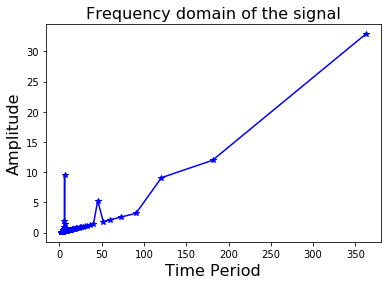

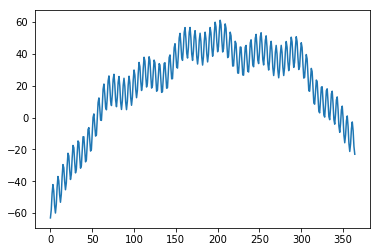

In [57]:
t_n = 1 #### total span of data take as 1
N = 365 #### number of points in the data
T = t_n / N ### sample freq 
f_s = 1/T  ### max period
 
x_value = np.linspace(0,t_n,N)
amplitudes = [10, 5, 8, 10, 30]
frequencies = [60, 8, 3, 2, 1] ## number of total waves
y_values = [(-1)*amplitudes[ii]*np.cos(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]

composite_y_value1 = np.sum(y_values, axis=0)
composite_y_value = np.sum(y_values, axis=0)+40*x_value
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)


plt.plot(1/f_values*N, fft_values,'-*', color='blue')
plt.xlabel('Time Period', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show() 
plt.plot(composite_y_value)
# 1/f_values*365

/home/panini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/panini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


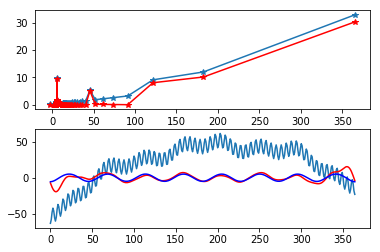

In [61]:
## my functions signal analysis

fig,ax=plt.subplots(2,1)
p,f,cl95=sa.spec(composite_y_value,1,3,0.05)
p1,f,cl95=sa.spec(composite_y_value1,1,3,0.05)

ax[0].plot(1/f,p**0.5*(2/365)**0.5,'*-')
ax[0].plot(1/f,p1**0.5*(2/365)**0.5,'r*-')

aa=sa.filter_signal_scipy(composite_y_value,1,20,100,0)
aa1=sa.filter_signal_scipy(composite_y_value1,1,20,100,0)

ax[1].plot(composite_y_value)
ax[1].plot(aa,'r')
ax[1].plot(aa1,'b')

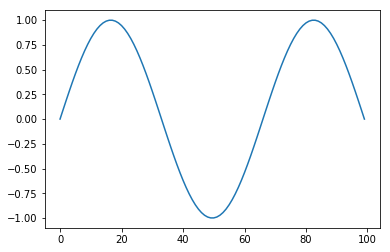

In [5]:
fr=1.5
plt.plot(np.sin(2*np.pi*(fr)*np.linspace(0,1,100)))


In [6]:
np.sum(p),np.sum(composite_y_value**2)


((220356.12602739813+0j), 220367.00000000003)

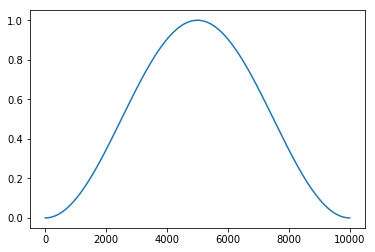

In [7]:
N=10000
w1=0.5-0.5*np.cos(2*np.pi*np.arange(N)/(N-1))
plt.plot(w1)

## cospectra and coherence squared of two artificial spectra

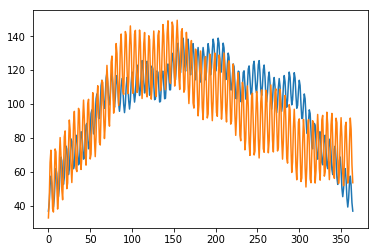

In [8]:
t_n = 1 #### total span of data
N = 365 #### number of points
T = t_n / N ### sample freq
f_s = 1/T  ### sample freq/time
 
x_value = np.linspace(0,t_n,N)

amplitudes1 = [10, 5, 8, 10, 30]
frequencies1 = [60, 8, 3, 2, 1]

amplitudes2 = [20, 5, 2, 10, 30]
frequencies2 = [65, 6, 3, 2, 1.2]
phase=[0,0,0,0,0]

y_values1 = [20+(-1)*amplitudes1[ii]*np.cos(2*np.pi*frequencies1[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value1 = np.sum(y_values1, axis=0)
y_values2 = [20+(-1)*amplitudes2[ii]*np.cos(2*np.pi*frequencies2[ii]*x_value+phase[ii]) for ii in range(0,len(amplitudes))]
composite_y_value2 = np.sum(y_values2, axis=0)

plt.plot(composite_y_value1)
plt.plot(composite_y_value2)


In [9]:
ntrials = 5
npts = 2

np.random.seed(1234)
y = np.random.rand(ntrials, npts)  # uniform distribution
ccoef = np.corrcoef(y)

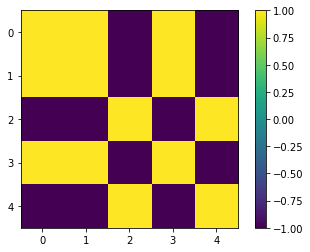

In [10]:
import matplotlib.pyplot as plt
plt.imshow(ccoef)
plt.colorbar()